In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 62503
catalog = 'CDMS'
mol_str = f'null'
cubes, tbl = fetch_cubes(cubefns, catalog=catalog, mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=67>
   FREQ      ERR    LGINT    DR    ELO    ...  F2l   F3l      name     Lab 
   MHz       MHz   nm2 MHz        1 / cm  ...                              
 float64   float64 float64 int64 float64  ... int64 int64    str11     bool
---------- ------- ------- ----- -------- ... ----- ----- ----------- -----
85603.5492  0.0013 -4.7585     3  18.0007 ...    --    -- aGg' glycol False
 85621.307    0.03 -6.4473     3 270.2198 ...    --    -- aGg' glycol  True
 85621.307    0.03 -6.3381     3 270.2198 ...    --    -- aGg' glycol  True
85649.2638  0.0023 -5.2615     3 112.9527 ...    --    -- aGg' glycol False
85672.8901  0.0024 -5.8033     3  52.3322 ...    --    -- aGg' glycol False
85762.0873  0.0041 -6.1698     3 238.3517 ...    --    -- aGg' glycol False
85762.2207  0.0041  -6.279     3 238.3517 ...    --    -- aGg' glycol False
 85785.195    0.01 -5.1942     3 147.7496 ...    --    -- aGg' glycol  True
85837.2478   0.004  -6.396     3 238.1449 ...    --    -- aGg' glycol

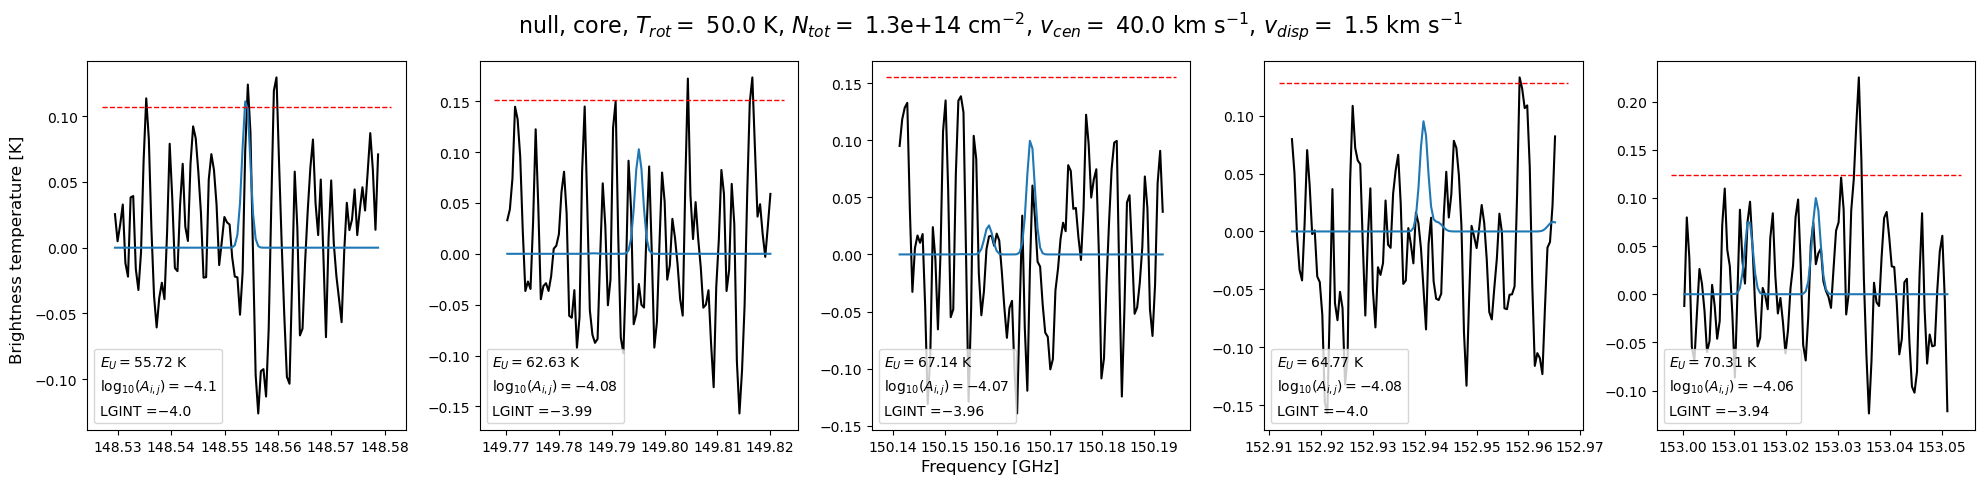

In [11]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.3e+14, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=5,
               nrows=1, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str, extr_type="coord", crd=crd,
               show_2_sigma=True, LGINT_cutoff=-4)

In [12]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

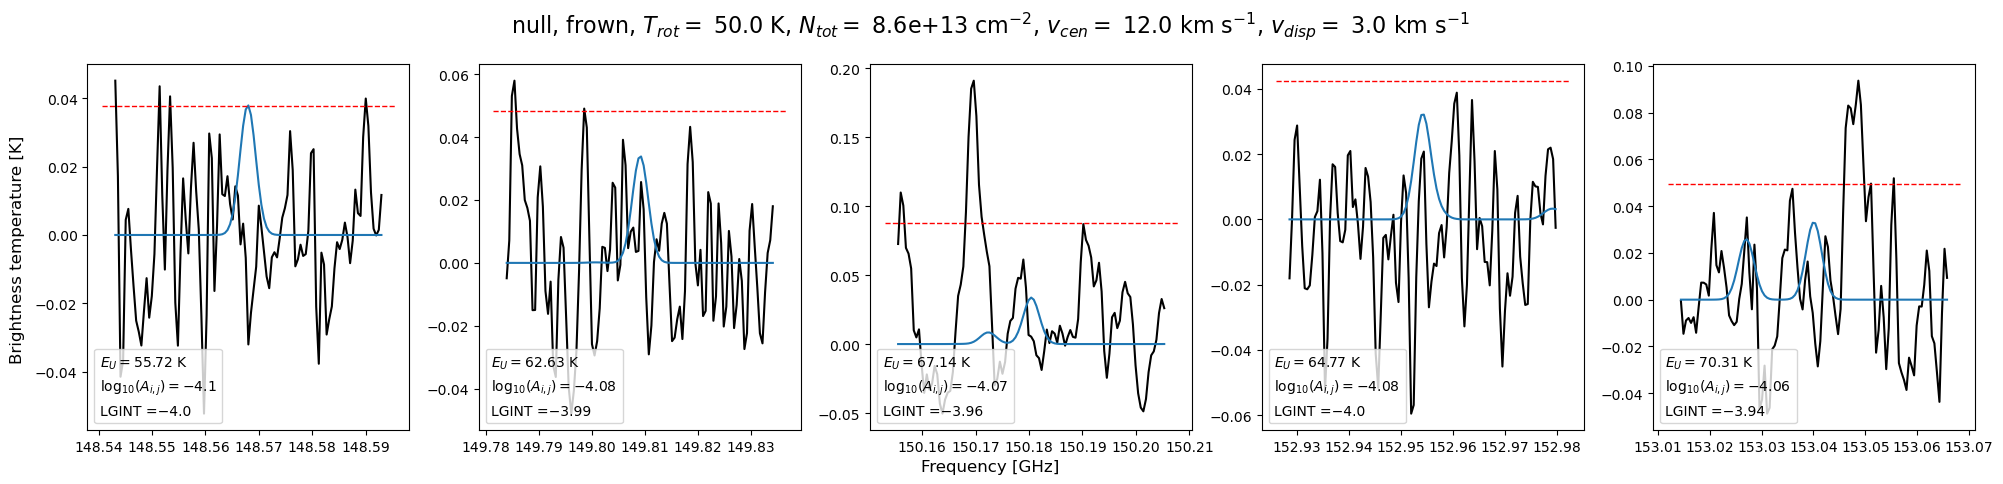

In [19]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 8.6e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=5,
                       nrows=1, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str,
                       extr_type="reg", show_2_sigma=True, return_freqs=True, LGINT_cutoff=-4)

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)